In [1]:
import pandas as pd
import numpy as np

# Question 1

In [2]:
train = pd.read_csv("./notes_train.csv")

In [3]:
train.head()

note 1  note 2  note 3  note 4  catégorie élève
0   11.75   10.81    8.16   11.19                0
1    9.01   10.65    5.86    9.07                0
2   15.47   16.75   10.04   14.53                0
3   11.53   16.42    4.18   13.41                0
4   16.54   16.74    5.55   15.02                0

# Question 2

On peut récupérer des informations globales sur le dataset en utilisant la méthode describe des Dataframe

In [4]:
train.describe()

note 1      note 2      note 3      note 4  catégorie élève
count  150.000000  150.000000  150.000000  150.000000       150.000000
mean    11.929667   13.479867    8.474533   11.690867         0.333333
std      3.032965    3.527372    3.243911    2.647896         0.472984
min      5.210000    5.070000    2.120000    4.860000         0.000000
25%      9.985000   10.997500    5.827500   10.055000         0.000000
50%     12.200000   13.785000    8.665000   11.990000         0.000000
75%     14.300000   16.162500   10.850000   13.607500         1.000000
max     16.920000   19.670000   14.900000   17.500000         1.000000

On peut filtrer la donnée et regarder les différences entre les catégories d'élèves

In [5]:
train[train["catégorie élève"] == 0].describe()

note 1      note 2      note 3      note 4  catégorie élève
count  100.000000  100.000000  100.000000  100.000000            100.0
mean    12.624100   15.044300    7.451500   12.801300              0.0
std      2.877103    2.692604    3.032458    2.099374              0.0
min      7.120000   10.070000    2.120000    7.590000              0.0
25%     10.347500   13.267500    5.072500   11.580000              0.0
50%     12.770000   15.125000    7.490000   13.020000              0.0
75%     14.977500   17.180000    9.730000   14.297500              0.0
max     16.920000   19.670000   13.700000   17.500000              0.0

In [6]:
train[train["catégorie élève"] == 1].describe()

note 1    note 2   note 3     note 4  catégorie élève
count  50.000000  50.00000  50.0000  50.000000             50.0
mean   10.540800  10.35100  10.5206   9.470000              1.0
std     2.880147   2.86397   2.6479   2.205945              0.0
min     5.210000   5.07000   5.0600   4.860000              1.0
25%     8.252500   7.67250   8.6800   7.682500              1.0
50%    11.015000  10.59500  10.1850   9.755000              1.0
75%    13.005000  12.40750  12.9425  11.175000              1.0
max    14.800000  14.94000  14.9000  13.000000              1.0

On peut faire une PCA sur les données pour la compresser.

On récupère les données en supprimant la colonne cible 'catégorie élève'

In [7]:
X_train = train.drop("catégorie élève", axis=1)

On effectue une PCA en normalisant les données par avance.

In [8]:
from sklearn.decomposition import PCA

In [9]:
X_train_normalized = X_train / X_train.std()

pca = PCA(n_components=2)
X_train_PCA = pca.fit_transform(X_train_normalized)

On transforme les données en dataframe pour plus de simplicité à la visualition et à l'utilisation des données

In [10]:
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.head()

0         1
0  0.514278  0.156377
1  1.254868  1.265870
2 -1.572903 -1.050995
3 -1.193145  1.124673
4 -2.292290  0.077735

## Visualisations

In [11]:
import matplotlib.pyplot as plt

On visualise les données par catégorie d'élèves

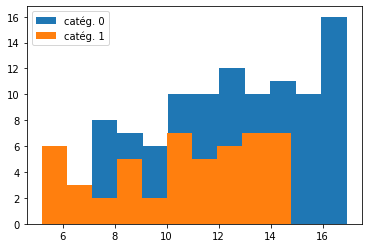

In [12]:
nom_colonne = "note 1"

plt.hist(
    X_train[train["catégorie élève"] == 0][nom_colonne],
    label="catég. 0" # Ajout d'une légende
)
plt.hist(
    X_train[train["catégorie élève"] == 1][nom_colonne],
    label="catég. 1" # Ajout d'une légende
)
plt.legend() # Affichage des légendes
plt.show()

Bien que les les distributions oranges et bleus soient différentes, leur intersection est très grande.

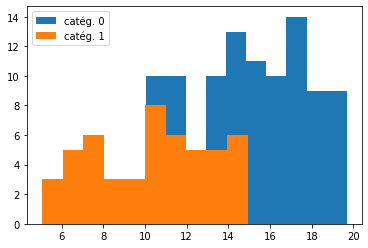

In [13]:
nom_colonne = "note 2"

plt.hist(
    X_train[train["catégorie élève"] == 0][nom_colonne],
    label="catég. 0" # Ajout d'une légende
)
plt.hist(
    X_train[train["catégorie élève"] == 1][nom_colonne],
    label="catég. 1" # Ajout d'une légende
)
plt.legend() # Affichage des légendes
plt.show()

La séparation est plus claire dans ce cas.

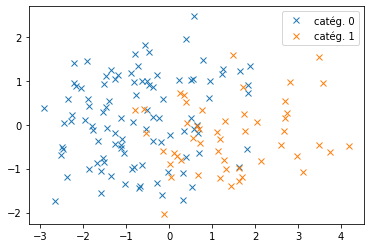

In [14]:
plt.plot(
    X_train_PCA[train["catégorie élève"] == 0][0],
    X_train_PCA[train["catégorie élève"] == 0][1],
    'x',
    label='catég. 0'
)
plt.plot(
    X_train_PCA[train["catégorie élève"] == 1][0],
    X_train_PCA[train["catégorie élève"] == 1][1],
    'x',
    label='catég. 1' 
)
plt.legend()
plt.show()

La séparation semble possible ici aussi.

# Entraînement d'un modèle

In [15]:
X = X_train
y = train["catégorie élève"]

Naive Bayes

In [16]:
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X, y)

BernoulliNB()

Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
model_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators=15, max_depth=2, random_state=1)
model_forest.fit(X, y)

RandomForestClassifier(max_depth=2, n_estimators=15, random_state=1)

KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model_neighbor = KNeighborsClassifier(n_neighbors=5)
model_neighbor.fit(X, y)

KNeighborsClassifier()

# Récupération de l'entrainement

In [20]:
test = pd.read_csv("./notes_test.csv")

In [21]:
X_test = test.drop("catégorie élève", axis=1)
y_test = test["catégorie élève"]

# Evaluation des modèles

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
model_a_evaluer = model_forest
confusion_matrix(y_test, model_a_evaluer.predict(X_test))

array([[99,  1],
       [19, 31]], dtype=int64)

In [24]:
model_a_evaluer = model_tree
confusion_matrix(y_test, model_a_evaluer.predict(X_test))

array([[87, 13],
       [11, 39]], dtype=int64)

Le modèle de Forêt fait 20 erreurs sur 150 tandis que le modèle d'abre en fait 24.

In [25]:
model_a_evaluer = model_nb 
confusion_matrix(y_test, model_a_evaluer.predict(X_test))

array([[100,   0],
       [ 50,   0]], dtype=int64)

le modèle de Bernoulli est très mauvais.

In [26]:
model_a_evaluer = model_neighbor
confusion_matrix(y_test, model_a_evaluer.predict(X_test))

array([[85, 15],
       [14, 36]], dtype=int64)

Le modèle des voisins est moins bon que le modèle des arbres.

# Exploration des modèles en modifiant les paramètres

Changez les paramètres dans les modèles pour observer les différences

#### Avec les arbres

In [27]:
model_tree = DecisionTreeClassifier(max_depth=1, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[99,  1],
       [22, 28]], dtype=int64)

In [28]:
model_tree = DecisionTreeClassifier(max_depth=2, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[99,  1],
       [22, 28]], dtype=int64)

In [29]:
model_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[87, 13],
       [11, 39]], dtype=int64)

In [30]:
model_tree = DecisionTreeClassifier(max_depth=4, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[93,  7],
       [13, 37]], dtype=int64)

In [31]:
model_tree = DecisionTreeClassifier(max_depth=5, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[92,  8],
       [13, 37]], dtype=int64)

In [32]:
model_tree = DecisionTreeClassifier(max_depth=6, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[83, 17],
       [13, 37]], dtype=int64)

In [33]:
model_tree = DecisionTreeClassifier(max_depth=7, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[93,  7],
       [13, 37]], dtype=int64)

In [34]:
model_tree = DecisionTreeClassifier(max_depth=8, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[95,  5],
       [17, 33]], dtype=int64)

In [35]:
model_tree = DecisionTreeClassifier(max_depth=9, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[94,  6],
       [17, 33]], dtype=int64)

In [36]:
model_tree = DecisionTreeClassifier(max_depth=10, random_state=1)
model_tree.fit(X, y)
confusion_matrix(y_test, model_tree.predict(X_test))

array([[94,  6],
       [17, 33]], dtype=int64)

### Avec les forêts

On utilise une boucle ici

In [37]:
for max_depth in range(1, 8):
    model_forest = RandomForestClassifier(n_estimators=15, max_depth=max_depth, random_state=1)
    model_forest.fit(X, y)
    print(f"max depth : {max_depth}")
    print("==============")
    print(confusion_matrix(y_test, model_forest.predict(X_test)))
    print()

max depth : 1
[[100   0]
 [ 20  30]]

max depth : 2
[[99  1]
 [19 31]]

max depth : 3
[[92  8]
 [15 35]]

max depth : 4
[[90 10]
 [14 36]]

max depth : 5
[[90 10]
 [13 37]]

max depth : 6
[[91  9]
 [14 36]]

max depth : 7
[[85 15]
 [13 37]]



# Conclusions - Exemples

Lorsque le modèle de forêt a une profondeur de 1 et lorsqu'il prédit la catégorie 1, nous sommes sûrs à 100% du résultat. Il s'appuie très fortement sur la note 2 pour la note 3.

In [38]:
model_forest = RandomForestClassifier(n_estimators=15, max_depth=1, random_state=1)
model_forest.fit(X, y)
print(dict(zip(X_train.columns, model_forest.feature_importances_)))

{'note 1': 0.0, 'note 2': 0.5333333333333333, 'note 3': 0.26666666666666666, 'note 4': 0.2}


Pour avoir une meilleure précision globale dans la prédiction, la profondeur de 2 est suffisante. Au-delà le modèle fera plus d'erreur sur le set de test ce qui indique un overfitting du modèle.

Le modèle utilise alors la note 2 ainsi qu'au même niveau les notes 3 & 4 

In [39]:
model_forest = RandomForestClassifier(n_estimators=15, max_depth=2, random_state=1)
model_forest.fit(X, y)
print(dict(zip(X_train.columns, model_forest.feature_importances_)))

{'note 1': 0.0, 'note 2': 0.5154426332580938, 'note 3': 0.2406984685338059, 'note 4': 0.24385889820810028}


# Et avec la PCA ?

In [40]:
X = X_train_PCA
X_test_PCA = pca.fit_transform(X_test / X_train.std())
for max_depth in range(1, 8):
    model_forest = RandomForestClassifier(n_estimators=15, max_depth=max_depth, random_state=1)
    model_forest.fit(X, y)
    print(f"max depth : {max_depth}")
    print("==============")
    print(confusion_matrix(y_test, model_forest.predict(X_test_PCA)))
    print()

max depth : 1
[[82 18]
 [14 36]]

max depth : 2
[[85 15]
 [15 35]]

max depth : 3
[[89 11]
 [15 35]]

max depth : 4
[[85 15]
 [12 38]]

max depth : 5
[[87 13]
 [12 38]]

max depth : 6
[[84 16]
 [13 37]]

max depth : 7
[[81 19]
 [13 37]]



La PCA engendre une perte d'informations trop élevées. La réduction des dimensions dans ce cas augment de 50% le nombre d'erreurs commises.